# Regression Modeling – Uber Taxi Fare Prediction

In this notebook, we train and evaluate regression models to predict the fare amount of Uber rides.

We will:
1. Load the cleaned dataset  
2. Select features and the target variable  
3. Split the data into training and test sets  
4. Train multiple regression models  
5. Evaluate them using R², RMSE, and MAE  
6. Compare model performance

In [3]:
import pandas as pd
# Option 1: if the file is in the same folder as this notebook
file_path = "uber_cleaned_data.csv"
df = pd.read_csv(file_path)
print("Loaded dataset from:", file_path)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

sklearn version: 1.7.2
Imports successful ✅


In [6]:
import pandas as pd

file_path = r"C:\Users\USER\OneDrive\Belgeler\uber.csv"

df = pd.read_csv(file_path)

print("Loaded dataset from:", file_path)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

df.head()

Loaded dataset from: C:\Users\USER\OneDrive\Belgeler\uber.csv
Shape: (200000, 9)
Columns: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
# Target variable
target_col = "fare_amount"

# Candidate feature columns
feature_cols = [
    "pickup_year",
    "pickup_month",
    "pickup_day",
    "pickup_hour",
    "pickup_weekday",
    "passenger_count",
    "distance_km"
]

print("All columns in the dataset:")
print(df.columns.tolist())

# Check which candidate features exist
available_features = [col for col in feature_cols if col in df.columns]
missing_features = [col for col in feature_cols if col not in df.columns]

print("\nAvailable feature columns:", available_features)
print("Missing feature columns:", missing_features)

# Use only available features
X = df[available_features]
y = df[target_col]

print("\nX shape:", X.shape)
print("y shape:", y.shape)


All columns in the dataset:
['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

Available feature columns: ['passenger_count']
Missing feature columns: ['pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_weekday', 'distance_km']

X shape: (200000, 1)
y shape: (200000,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,   # 20% test, 80% train
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (160000, 1)
X_test shape: (40000, 1)
y_train shape: (160000,)
y_test shape: (40000,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        random_state=42
    )
}

models


{'Linear Regression': LinearRegression(),
 'Random Forest': RandomForestRegressor(n_jobs=-1, random_state=42),
 'Gradient Boosting': GradientBoostingRegressor(random_state=42)}

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

results = []

for name, model in models.items():
    print(f"🔹 Training model: {name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

results_df = pd.DataFrame(results)
results_df


🔹 Training model: Linear Regression
🔹 Training model: Random Forest
🔹 Training model: Gradient Boosting


,Model,RMSE,MAE,R2
0,Linear Regression,10.310509,6.104082,0.000136
1,Random Forest,10.309334,6.105511,0.000364
2,Gradient Boosting,10.309333,6.103987,0.000364


In [11]:
# Sort by R2 (higher is better)
results_df_sorted = results_df.sort_values(by="R2", ascending=False)
results_df_sorted
best_model_name = results_df_sorted.iloc[0]["Model"]
print("Best model based on R2:", best_model_name)

best_model = models[best_model_name]


Best model based on R2: Gradient Boosting


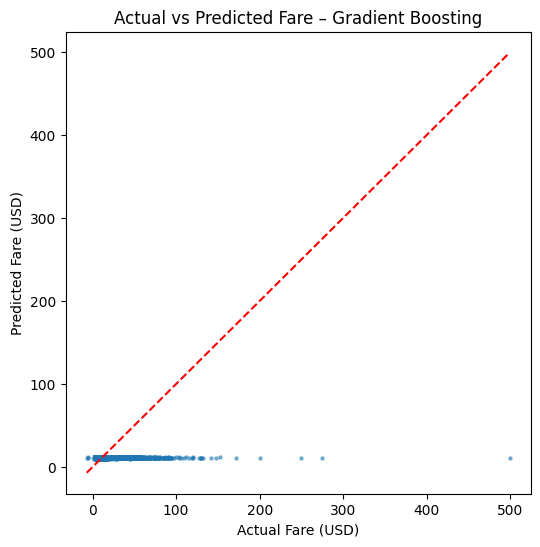

In [12]:
import matplotlib.pyplot as plt

# Predict again using best model
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, s=5, alpha=0.5)
plt.xlabel("Actual Fare (USD)")
plt.ylabel("Predicted Fare (USD)")
plt.title(f"Actual vs Predicted Fare – {best_model_name}")

# Reference line y = x
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.show()


,Feature,Importance
0,passenger_count,1.0


<Figure size 800x400 with 0 Axes>

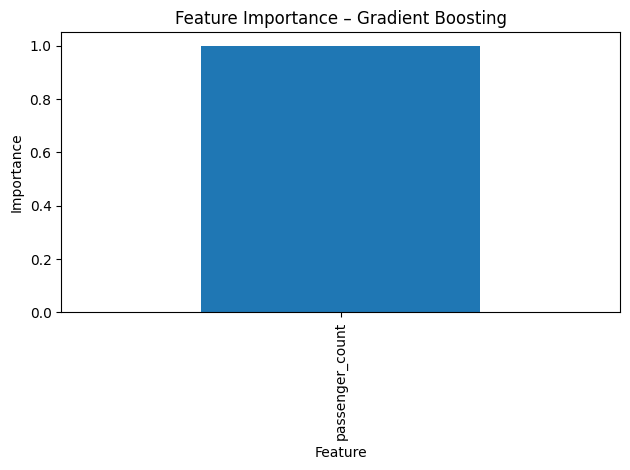

In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt

if isinstance(best_model, (RandomForestRegressor, GradientBoostingRegressor)):
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    
    display(feature_importance_df)
    
    plt.figure(figsize=(8, 4))
    feature_importance_df.plot(
        x="Feature",
        y="Importance",
        kind="bar",
        legend=False
    )
    plt.title(f"Feature Importance – {best_model_name}")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()
else:
    print("Best model is not tree-based, feature importance plot is not available.")
